In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import request

In [2]:
dataset=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)
dataset


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
dataset[1]=dataset[1].replace({'M':1,'B':0})
dataset[10]

C:\Users\Student\AppData\Local\Temp\ipykernel_5564\4060326543.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[1]=dataset[1].replace({'M':1,'B':0})


0      0.2419
1      0.1812
2      0.2069
3      0.2597
4      0.1809
        ...  
564    0.1726
565    0.1752
566    0.1590
567    0.2397
568    0.1587
Name: 10, Length: 569, dtype: float64

In [4]:
X=dataset[[2,3,4,5,6,7,8,9,10]].values
y=dataset[1].values

In [5]:
class LogisticRegression:
    def __init__(self,lr=0.1,epochs=3000):
        self.lr = lr
        self.epochs =epochs
        self.weight = None
        self.bias = None
        self.losses = []
    def fit(self,X,y):
        n_samples,n_features = X.shape
        np.random.seed(42)
        self.weight = np.random.randn(n_features)
        self.bias = np.random.randn()
        X =(X-X.mean())/ X.std()
        for _ in range(self.epochs):
            linear_model_output = np.dot(X, self.weight) + self.bias
            y_predicted = self._sigmoid(linear_model_output)
            error = y_predicted - y

            gradient_weight = (1/n_samples)*np.dot(X.T, error)
            gradient_bias = (1/n_samples)*np.sum(error)

            self.weight -= self.lr * gradient_weight
            self.bias -= self.lr * gradient_bias

            loss =  - np.mean(y*np.log(y_predicted)+(1-y)*np.log(1-y_predicted))
            self.losses.append(loss)
    def predict(self, X):
        X =(X-X.mean())/ X.std()
        linear_model_output = np.dot(X,self.weight) + self.bias
        # y_predicted =np.clip(self._sigmoid(linear_model_output),1e-15, 1 - 1e-15)
        y_predicted = self._sigmoid(linear_model_output)
        return y_predicted
    def _sigmoid(self,z):
        z = np.clip(z,-500,500)
        return 1/(1+np.exp(-z))

In [6]:
model=LogisticRegression()

In [7]:
model.fit(X,y)

In [8]:
model_predi=model.predict(X)

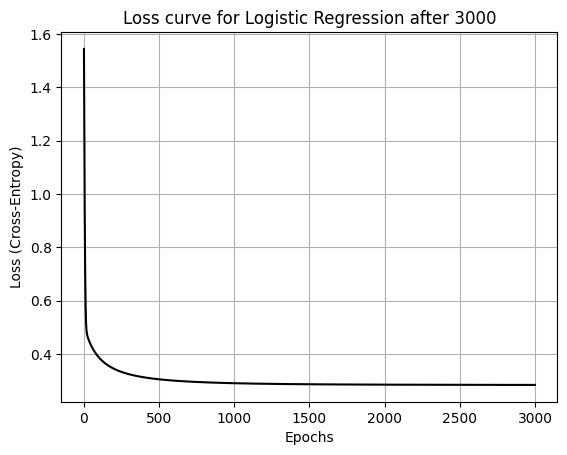

In [16]:
plt.plot(model.losses,color='black')
plt.xlabel("Epochs")
plt.ylabel("Loss (Cross-Entropy)")
plt.title(f"Loss curve for Logistic Regression after {model.epochs}")
plt.grid(True)

plt.show()
# plt.plot(model.predict(X), color='purple')
# plt.xlabel("Epochs")
# plt.ylabel("Loss (Cross-Entropy)")
# plt.title("Loss curve for Logistic Regression after {model.epochs}")
# plt.grid(True)
# plt.show()

In [10]:
model_predi

array([0.97354551, 0.99926911, 0.99724892, 0.03609342, 0.99899635,
       0.09159378, 0.98296909, 0.24471293, 0.14589107, 0.09510618,
       0.79324632, 0.75772972, 0.99370542, 0.76708062, 0.25151552,
       0.45678698, 0.5126784 , 0.79873482, 0.99851564, 0.21324784,
       0.14047629, 0.00939093, 0.57155782, 0.99970246, 0.9266423 ,
       0.93330217, 0.4129008 , 0.99059185, 0.65634432, 0.95614019,
       0.99040309, 0.06270614, 0.92512401, 0.99577639, 0.80941505,
       0.89658838, 0.37655791, 0.14486745, 0.55922887, 0.20729702,
       0.21222125, 0.029827  , 0.99208725, 0.18200952, 0.16043624,
       0.98856764, 0.0041838 , 0.16326237, 0.06711212, 0.21014189,
       0.05477254, 0.22485191, 0.05984018, 0.9816342 , 0.59470283,
       0.04407962, 0.99502004, 0.44220867, 0.1500332 , 0.00528779,
       0.01468855, 0.00540731, 0.4142416 , 0.00816533, 0.11780185,
       0.47876296, 0.00935128, 0.03745066, 0.00744281, 0.11668449,
       0.99370081, 0.00681788, 0.94530376, 0.25238624, 0.08464

In [11]:
model.losses

[np.float64(1.5435489112427476),
 np.float64(1.4067846101245927),
 np.float64(1.2778294576334028),
 np.float64(1.1577585369028334),
 np.float64(1.0475710663040132),
 np.float64(0.9481005154312573),
 np.float64(0.8599223831811897),
 np.float64(0.783276282593076),
 np.float64(0.7180197306396343),
 np.float64(0.6636262482017565),
 np.float64(0.6192308830810502),
 np.float64(0.5837152302117342),
 np.float64(0.5558153279168367),
 np.float64(0.5342322091978708),
 np.float64(0.5177270143771441),
 np.float64(0.5051890186114734),
 np.float64(0.4956730133829335),
 np.float64(0.48840941487533485),
 np.float64(0.4827945026383774),
 np.float64(0.4783691014740921),
 np.float64(0.47479273908449493),
 np.float64(0.4718181081674258),
 np.float64(0.4692685071942165),
 np.float64(0.4670193071207405),
 np.float64(0.4649834780536103),
 np.float64(0.46310069560341494),
 np.float64(0.46132936341982766),
 np.float64(0.459640890804174),
 np.float64(0.4580156518405714),
 np.float64(0.45644016579724805),
 np.flo

In [12]:
model.predict(np.array([[20.57,	17.77	,132.90	,1326.0,	0.08474,	0.07864,	0.08690,	0.07017,  0.2419]]))

array([0.53127288])

In [13]:
re=np.array([[[20.57,	17.77	,132.90	,1326.0,	0.08474,	0.07864,	0.08690,	0.07017,  0.2419]]])
